<a href="https://colab.research.google.com/github/Mohak91/Course-on-comparative-genomics-of-bacteria/blob/main/Lab_practical_session_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/comp_gen_bacteria_krea

/content/drive/MyDrive/comp_gen_bacteria_krea


In [5]:
!head /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna

>NC_000908.2 Mycoplasma genitalium G37, complete sequence
TAAGTTATTATTTAGTTAATACTTTTAACAATATTATTAAGGTATTTAAAAAATACTATTATAGTATTTAACATAGTTAA
ATACCTTCCTTAATACTGTTAAATTATATTCAATCAATACATATATAATATTATTAAAATACTTGATAAGTATTATTTAG
ATATTAGACAAATACTAATTTTATATTGCTTTAATACTTAATAAATACTACTTATGTATTAAGTAAATATTACTGTAATA
CTAATAACAATATTATTACAATATGCTAGAATAATATTGCTAGTATCAATAATTACTAATATAGTATTAGGAAAATACCA
TAATAATATTTCTACATAATACTAAGTTAATACTATGTGTAGAATAATAAATAATCAGATTAAAAAAATTTTATTTATCT
GAAACATATTTAATCAATTGAACTGATTATTTTCAGCAGTAATAATTACATATGTACATAGTACATATGTAAAATATCAT
TAATTTCTGTTATATATAATAGTATCTATTTTAGAGAGTATTAATTATTACTATAATTAAGCATTTATGCTTAATTATAA
GCTTTTTATGAACAAAATTATAGACATTTTAGTTCTTATAATAAATAATAGATATTAAAGAAAATAAAAAAATAGAAATA
AATATCATAACCCTTGATAACCCAGAAATTAATACTTAATCAAAAATGAAAATATTAATTAATAAAAGTGAATTGAATAA


^ Caret symbol. Special character. the start of the line

$ Dollar. Special character. the end of the line

In [6]:
!grep "^>" /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna

>NC_000908.2 Mycoplasma genitalium G37, complete sequence


###There is only one chromosome in this organism as there is just one info line.

##1. Gene length distribution

Gene annotation files: gff, gtf, gbff

We will make use of gff file. Each file has a format that can be exploited as per our use case.

In [7]:
!head -15 /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM2732v1
#!genome-build-accession NCBI_Assembly:GCF_000027325.1
#!annotation-date 04/11/2022 13:19:11
#!annotation-source NCBI RefSeq 
##sequence-region NC_000908.2 1 580076
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=243273
NC_000908.2	RefSeq	region	1	580076	.	+	.	ID=NC_000908.2:1..580076;Dbxref=ATCC:33530,taxon:243273;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;note=strain coidentity: G37 %3D ATCC 33530;old-name=Mycoplasma genitalium G-37;strain=G-37;type-material=type strain of Mycoplasma genitalium
NC_000908.2	RefSeq	gene	686	1828	.	+	.	ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001
NC_000908.2	Protein Homology	CDS	686	1828	.	+	0	ID=cds-WP_009885562.1;Parent=gene-MG_RS00005;Dbxref=Genbank:WP_009885562.1;Name=WP_009885562.1;Ontology_term=GO:0006260,GO:0003887,GO:000

Algorithm to find gene length distribution:
1. Read in a gff file.
2. Note, lines starting with # are general information lines. For gene length calculation, we don't need them.
3. For all other non-# lines, they are spread across multiple columns. Each column is separated by the other using a tab (\t). That is the general format of any given gff file.
4. Note, all lines with third column as "gene" gives the information about a given gene.
5. Fourth and fifth column for any given row will give us the start and stop position of that gene in the entire genome. We can use these to calculate gene length.
6. 580076-1+1

(1828-686)+1

1828-685 = (1828-686)+1
7. We have to repeat the calculation in step 6 for all rows till the end of the file wherever the third column has the keyword "gene".
8. Save it in either a file as output or some data structure like lists. The latter will be useful if one wants to do some additional analysis on the list of gene lengths.

In [10]:
#making a global variable storing the name of the annotation file in gff format along with the entire path
GFF="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff"

In [22]:
#importing libraries that we would need in our code below
import statistics
import matplotlib.pyplot as plt

In [23]:
#function definitions
def read_gff_list(gff_file):
  """This line reads in gff file.
  Only reads lines not starting with the hash.
  Splits each line on the basis of a tab-delimiter.
  Then only for those lines where the third column has the keyword "gene",
  it subtracts the start position from the stop position of each gene,
  to get the gene length. Since gff is one based, we add one again in the end,
  to get the actual length of the gene. 
  Finally you append all gene lengths into a list and return that list.
  """
  gene_length_list=[]
  with open(gff_file) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          #print(line_list)
          gene_length=int(line_list[4]) - int(line_list[3]) + 1
          gene_length_list.append(gene_length)
        else:
          pass
  return gene_length_list

def calculate_gene_length_summary(gene_length_list):
  """Takes in a list as an argument and using the library statistics,
  it calculates mean, median and mode. And returns all three values"""
  mean=statistics.mean(gene_length_list)
  median=statistics.median(gene_length_list)
  mode=statistics.mode(gene_length_list)
  return mean, median, mode

def plot_histogram(gene_length_list):
  #takes in a list of values and plots a histogram
  plt.hist(gene_length_list) #histogram method of the package/module/library matplotlib.pyplot
  plt.show()

In [21]:
#function calls

gene_length_list = read_gff_list(GFF)
print(gene_length_list)

mean, median, mode = calculate_gene_length_summary(gene_length_list)
print("Mean: %f\nMedian: %f\nMode: %f\n"%(mean,median,mode))



[1143, 933, 1953, 2511, 1254, 633, 765, 1329, 789, 657, 864, 864, 822, 76, 77, 1872, 1770, 3096, 1170, 927, 1539, 438, 867, 1104, 897, 573, 456, 606, 561, 621, 4356, 2001, 777, 642, 1245, 1671, 1350, 1527, 1155, 1776, 267, 1680, 858, 855, 1452, 948, 1152, 258, 1341, 717, 672, 1266, 393, 1653, 951, 372, 147, 384, 834, 537, 999, 438, 894, 1704, 89, 2043, 912, 204, 3996, 1401, 1947, 1551, 1425, 327, 1005, 273, 2727, 855, 2625, 2421, 1971, 414, 3075, 417, 1179, 1131, 1209, 2547, 414, 681, 570, 873, 936, 1149, 420, 468, 2067, 627, 483, 315, 453, 1407, 1197, 1953, 732, 1434, 1434, 1434, 669, 948, 843, 234, 2178, 603, 651, 630, 783, 1164, 837, 1296, 630, 1371, 666, 474, 756, 645, 1023, 1695, 1563, 921, 2130, 1416, 309, 858, 1044, 438, 780, 354, 1455, 282, 426, 795, 303, 843, 1473, 1197, 1797, 1710, 405, 501, 1518, 2916, 109, 3342, 1596, 273, 1860, 339, 840, 810, 1275, 1128, 1230, 846, 465, 321, 774, 636, 321, 858, 264, 435, 807, 417, 603, 258, 369, 327, 543, 186, 426, 555, 348, 636, 453, 1428

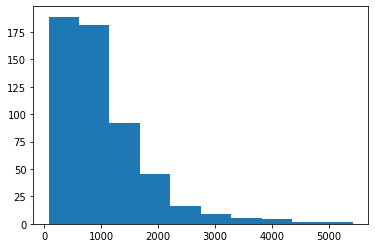

In [24]:
plot_histogram(gene_length_list)

Does this reconcile with what we discussed in the class?

From NCBI, download 5 or more gff files from other bacteria (pathogenic, non-pathogenic, free living, obligate symbionts etc.) and try to see how much the mean, median, mode and distribution changes for gene lengths in each of those organisms (same as above). For example, gff file of Escherichia coli, Mycobacterium tuberculosis etc.

Maybe plot a distribution of mean gene lengths across all these organisms that you choose to take? (Hint: You just need to pass a list of mean gene lengths across all organisms that you wish to include in your analysis into the plot_histogram function that we created above.)